# importing libraries

In [1]:
import pandas as pd
import numpy
import sklearn
import numpy as np
import  matplotlib.pyplot as plt

# Reading csv file 

In [2]:
df = pd.read_csv('D:\high radius\H2HBABBA2155.csv')

In [4]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200781803,JRD associates,2019-08-26 00:00:00,2019.0,1.929715e+09,2019-08-06,20190807,20190806,20190826.0,USD,RV,1.0,NaN,7077.05,20190806.0,NAD1,1.929715e+09,0
1,U001,0200772670,ASSOCIAT systems,2019-12-26 00:00:00,2019.0,1.930252e+09,2019-12-09,20191209,20191209,20191224.0,USD,RV,1.0,NaN,79240.12,20191209.0,NAU5,1.930252e+09,0
2,U001,0200762301,C&S WH systems,2020-01-22 00:00:00,2020.0,1.930345e+09,2020-01-04,20200102,20200104,20200119.0,USD,RV,1.0,NaN,70810.05,20200104.0,NAC6,1.930345e+09,0
3,U001,0200705742,DOT in,NaN,2020.0,1.930641e+09,2020-03-11,20200311,20200311,20200412.0,USD,RV,1.0,NaN,543.23,20200311.0,NA32,1.930641e+09,1
4,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930827e+09,2020-04-26,20200425,20200426,20200511.0,USD,RV,1.0,NaN,5360.79,20200426.0,NAH4,1.930827e+09,1


# Pre Processing

In [6]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

In [7]:
df.nunique()

business_code                 6
cust_number                1434
name_customer              4230
clear_date                  403
buisness_year                 2
doc_id                    48812
posting_date                502
document_create_date        505
document_create_date.1      503
due_in_date                 547
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         44223
baseline_create_date        504
cust_payment_terms           75
invoice_id                48808
isOpen                        2
dtype: int64

In [8]:
df = df.rename(columns={'document type': 'document_type'})

In [9]:
df.columns


Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document_type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

# Dropping unnecessary columns

In [10]:
df2 = df.drop(['business_code', 'area_business', 'posting_id', 'doc_id', 'document_type'], axis='columns')
df2

,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,0200781803,JRD associates,2019-08-26 00:00:00,2019.0,2019-08-06,20190807,20190806,20190826.0,USD,7077.05,20190806.0,NAD1,1.929715e+09,0
1,0200772670,ASSOCIAT systems,2019-12-26 00:00:00,2019.0,2019-12-09,20191209,20191209,20191224.0,USD,79240.12,20191209.0,NAU5,1.930252e+09,0
2,0200762301,C&S WH systems,2020-01-22 00:00:00,2020.0,2020-01-04,20200102,20200104,20200119.0,USD,70810.05,20200104.0,NAC6,1.930345e+09,0
3,0200705742,DOT in,NaN,2020.0,2020-03-11,20200311,20200311,20200412.0,USD,543.23,20200311.0,NA32,1.930641e+09,1
4,0200769623,WAL-MAR corporation,NaN,2020.0,2020-04-26,20200425,20200426,20200511.0,USD,5360.79,20200426.0,NAH4,1.930827e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,140104440,SO foundation,2019-04-22 00:00:00,2019.0,2019-04-05,20190405,20190405,20190415.0,CAD,121502.65,20190405.0,CA10,2.960539e+09,0
49996,0200726979,BJ'S co,2019-08-30 00:00:00,2019.0,2019-08-15,20190816,20190815,20190830.0,USD,399.07,20190815.0,NAA8,1.929753e+09,0
49997,0200782249,ACE trust,2019-08-23 00:00:00,2019.0,2019-08-09,20190808,20190809,20190824.0,USD,39776.61,20190809.0,NAA8,1.929723e+09,0
49998,0200799538,UNITE in,2019-10-30 00:00:00,2019.0,2019-10-15,20191011,20191015,20191030.0,USD,25723.35,20191015.0,NAA8,1.930001e+09,0


# Checking for null values

In [11]:
df2.isnull().sum()

cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    5
isOpen                        0
dtype: int64

In [12]:
#Separating the 10000 values of clear_date into another dataset 
df_train_test = df2.loc[df2.loc[:, 'clear_date'].notnull()]
print(len(df_train_test))
df_train_test.head()

40000


,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,0200781803,JRD associates,2019-08-26 00:00:00,2019.0,2019-08-06,20190807,20190806,20190826.0,USD,7077.05,20190806.0,NAD1,1.929715e+09,0
1,0200772670,ASSOCIAT systems,2019-12-26 00:00:00,2019.0,2019-12-09,20191209,20191209,20191224.0,USD,79240.12,20191209.0,NAU5,1.930252e+09,0
2,0200762301,C&S WH systems,2020-01-22 00:00:00,2020.0,2020-01-04,20200102,20200104,20200119.0,USD,70810.05,20200104.0,NAC6,1.930345e+09,0
6,0200783609,PROFIC associates,2020-02-26 00:00:00,2020.0,2020-02-10,20200208,20200210,20200225.0,USD,43016.22,20200210.0,NAA8,1.930507e+09,0
7,0200780383,MEIJ in,2019-08-19 00:00:00,2019.0,2019-08-01,20190731,20190801,20190816.0,USD,150187.98,20190801.0,NAA8,1.929682e+09,0


In [13]:
#This dataset is the prediction dataset which will be used to predict the payment date
df_predict = df2.loc[df2.loc[:, 'clear_date'].isnull()]
print(len(df_predict))
df_predict.head()

10000


,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
3,0200705742,DOT in,NaN,2020.0,2020-03-11,20200311,20200311,20200412.0,USD,543.23,20200311.0,NA32,1.930641e+09,1
4,0200769623,WAL-MAR corporation,NaN,2020.0,2020-04-26,20200425,20200426,20200511.0,USD,5360.79,20200426.0,NAH4,1.930827e+09,1
5,0200416837,DEC,NaN,2020.0,2020-03-20,20200320,20200320,20200408.0,USD,1306.94,20200316.0,NAM4,1.930672e+09,1
15,0140106408,WAL-M trust,NaN,2020.0,2020-03-31,20200331,20200331,20200410.0,CAD,73457.96,20200331.0,CA10,2.960625e+09,1
21,0140104285,BUY- in,NaN,2020.0,2020-04-13,20200414,20200413,20200502.0,CAD,7183.23,20200422.0,CA10,2.960629e+09,1


In [14]:
df_train_test = df_train_test.loc[df_train_test['invoice_id'].notnull()]
print(len(df_train_test))

39995


In [15]:
df_train_test.isnull().sum()

cust_number               0
name_customer             0
clear_date                0
buisness_year             0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                0
isOpen                    0
dtype: int64

In [16]:
#checking data type
df_train_test.dtypes

cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [17]:
#changing into datetime format
df_train_test['clear_date'] = pd.to_datetime(df_train_test['clear_date'])
df_train_test['posting_date'] = pd.to_datetime(df_train_test['posting_date'])

In [18]:
#changing into datetime format
df_train_test['document_create_date'] = pd.to_datetime(df_train_test['document_create_date'], format='%Y%m%d')
#now again checking datatypes after the conversion
df_train_test.dtypes

cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1             int64
due_in_date                      float64
invoice_currency                  object
total_open_amount                float64
baseline_create_date             float64
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
dtype: object

In [19]:
#now since many values has to be change into the format of datetime so now changing it
df_train_test['document_create_date.1'] = pd.to_datetime(df_train_test['document_create_date.1'], format='%Y%m%d')
df_train_test['baseline_create_date'] = pd.to_datetime(df_train_test['baseline_create_date'], format='%Y%m%d')
df_train_test['due_in_date'] = pd.to_datetime(df_train_test['due_in_date'], format='%Y%m%d')

# now again checking datatypes after the conversion
df_train_test.dtypes

cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
dtype: object

In [20]:
df_train_test.head()

,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,0200781803,JRD associates,2019-08-26,2019.0,2019-08-06,2019-08-07,2019-08-06,2019-08-26,USD,7077.05,2019-08-06,NAD1,1.929715e+09,0
1,0200772670,ASSOCIAT systems,2019-12-26,2019.0,2019-12-09,2019-12-09,2019-12-09,2019-12-24,USD,79240.12,2019-12-09,NAU5,1.930252e+09,0
2,0200762301,C&S WH systems,2020-01-22,2020.0,2020-01-04,2020-01-02,2020-01-04,2020-01-19,USD,70810.05,2020-01-04,NAC6,1.930345e+09,0
6,0200783609,PROFIC associates,2020-02-26,2020.0,2020-02-10,2020-02-08,2020-02-10,2020-02-25,USD,43016.22,2020-02-10,NAA8,1.930507e+09,0
7,0200780383,MEIJ in,2019-08-19,2019.0,2019-08-01,2019-07-31,2019-08-01,2019-08-16,USD,150187.98,2019-08-01,NAA8,1.929682e+09,0


In [44]:
(df_train_test['baseline_create_date']!= df_train_test['posting_date']).sum()

4411

In [45]:
df_train_test.nunique()

cust_number                1345
name_customer              3907
clear_date                  403
buisness_year                 2
posting_date                422
document_create_date        426
document_create_date.1      422
due_in_date                 491
invoice_currency              2
total_open_amount         35617
baseline_create_date        430
cust_payment_terms           72
invoice_id                39100
isOpen                        1
dtype: int64

In [21]:
# changing from float to datetime format with respect to year for buisness_year
df_train_test['buisness_year'] = pd.to_datetime(df_train_test['buisness_year'], format='%Y')

In [22]:
#checking the length of the dataset
len(df_train_test)

39995

# EDA

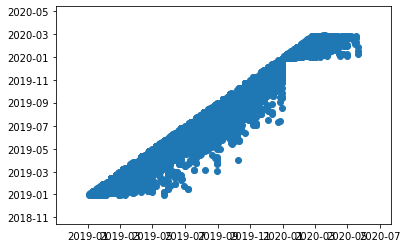

In [23]:
#Scatter plotting between clear_date and posting_date to check how it is been formed
plt.scatter(df_train_test['clear_date'],df_train_test['posting_date'])
# we can see it is linearly formed so we will use LinearRegression model for the prediction

# Splittig into train set and test set

In [24]:
#splitting into 20% by using train_test_split function
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_train_test, test_size=.2)

In [25]:
#calculating the train set length which is of 80%
len(df_train)

31996

In [26]:
#calculating the train set length which is of remaining 20%
len(df_test)

7999

In [27]:
x_train = df_train.loc[:, 'posting_date']
y_train = df_train.loc[:, 'clear_date']

In [95]:
#mapping the datetime to the ordinal value format
type(x_train)
import datetime as dt
post = df_train.loc[:, 'posting_date'].map(dt.datetime.toordinal)
docdate=df_train.loc[:,'document_create_date'].map(dt.datetime.toordinal)
due=df_train.loc[:,'due_in_date'].map(dt.datetime.toordinal)

In [96]:
#checking the type of dataset
type(post)

pandas.core.series.Series

In [97]:
#array of posting_date ordinal values
post.values

array([737170, 737457, 737322, ..., 737363, 737135, 737110], dtype=int64)

In [100]:
#array of document_create_date ordinal values
docdate.values

array([737170, 737456, 737322, ..., 737364, 737135, 737110], dtype=int64)

In [101]:
#array of due_in_date ordinal values
due.values

array([737185, 737472, 737337, ..., 737378, 737145, 737125], dtype=int64)

In [102]:
zz = df_train.loc[:, 'clear_date'].map(dt.datetime.toordinal)

In [103]:
#checkig the rows and columns
post.shape


(31996,)

In [104]:
import numpy as np
post=post[:, np.newaxis]

In [105]:
docdate = docdate[:, np.newaxis]

In [106]:
due=due[:,np.newaxis]

In [107]:
final = np.concatenate((post, docdate,due), axis=1)

In [108]:
final.shape

(31996, 3)

In [109]:
type(final)

numpy.ndarray

In [110]:
# ss = rr[np.newaxis, :]
# ss = np.reshape(rr, (-1, 31996))

In [111]:
final.shape


(31996, 3)

In [112]:
zz.shape

(31996,)

# Building Model

In [113]:
import numpy as np
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(final, zz)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [114]:
x_test = df_train.loc[:, 'posting_date']
x_test1=df_train.loc[:,'document_create_date']
x_test2=df_train.loc[:,'due_in_date']
y_test = df_train.loc[:, 'clear_date'].map(dt.datetime.toordinal)

In [115]:
x_testa = x_test.map(dt.datetime.toordinal)
testing1=x_test1.map(dt.datetime.toordinal)
testing2=x_test2.map(dt.datetime.toordinal)
x_testb = x_testa[:, np.newaxis]
x_testb

array([[737170],
       [737457],
       [737322],
       ...,
       [737363],
       [737135],
       [737110]], dtype=int64)

In [116]:
x_testc=testing1[:,np.newaxis]
x_testd=testing2[:,np.newaxis]

In [117]:
hi=np.concatenate((x_testb,x_testc,x_testd), axis=1)


# Checking Prediction

In [135]:
linear_model.predict(hi)

array([737186.50754575, 737472.76182531, 737338.00713516, ...,
       737378.67302222, 737147.70690182, 737126.70507625])

In [136]:
#checking the score and the accuracy
linear_model.score(hi, y_test)

0.9926071684538236

In [137]:

f=prediction.to_pydatetime().date()

AttributeError: 'numpy.ndarray' object has no attribute 'to_pydatetime'